<a href="https://colab.research.google.com/github/GustavoSatig/dataScience/blob/main/temporalSeriesDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [3]:
import kagglehub

path = kagglehub.dataset_download("arashnic/soalr-wind")

print("Path to dataset files:", path)

100%|██████████| 276M/276M [00:05<00:00, 53.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/soalr-wind/versions/2


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

data_path = '/root/.cache/kagglehub/datasets/arashnic/soalr-wind/versions/2/solar_wind.csv'
labels_path = '/root/.cache/kagglehub/datasets/arashnic/soalr-wind/versions/2/labels.csv'

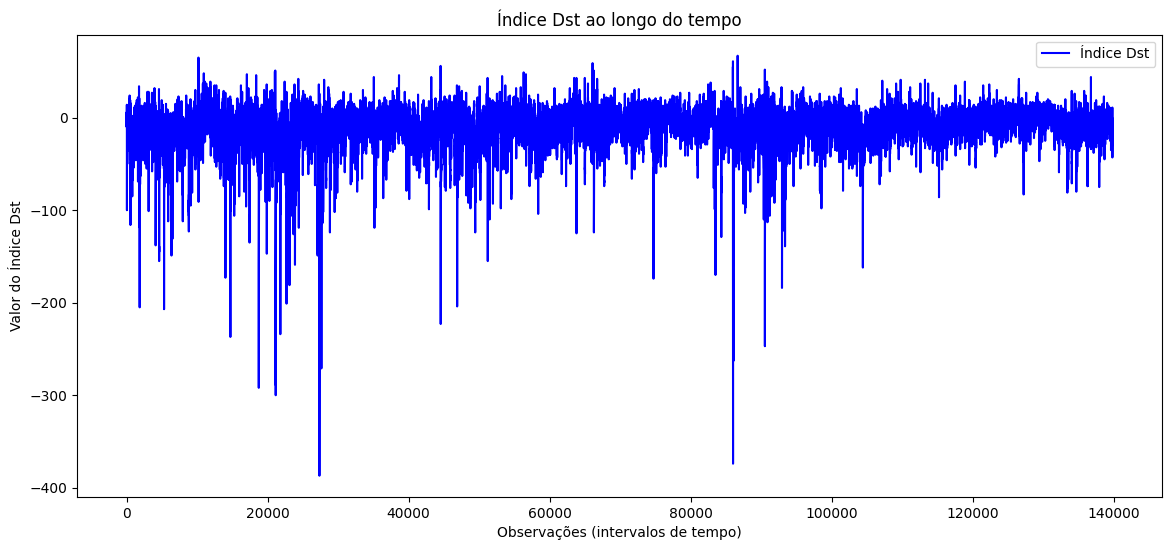

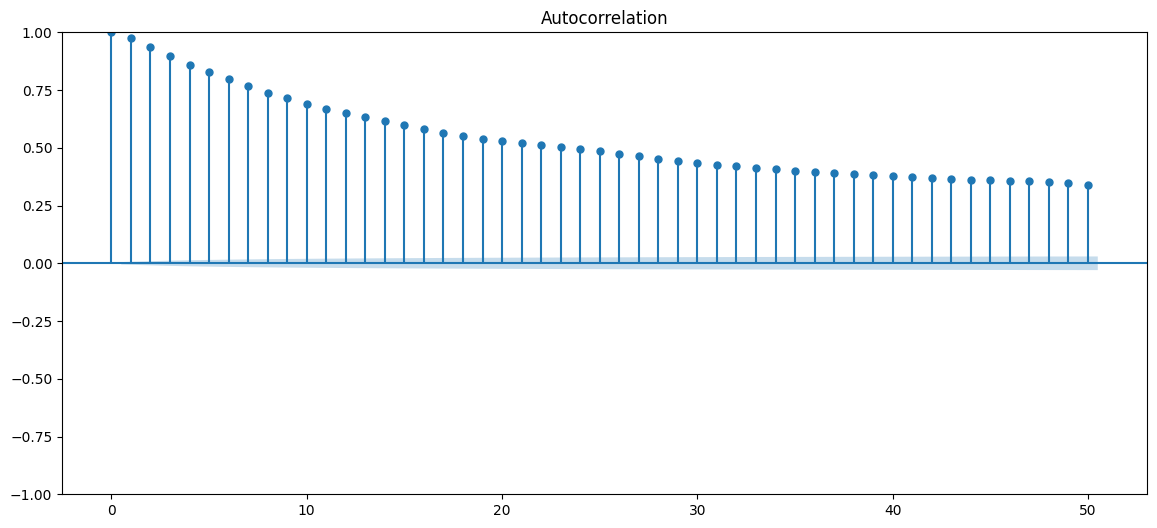

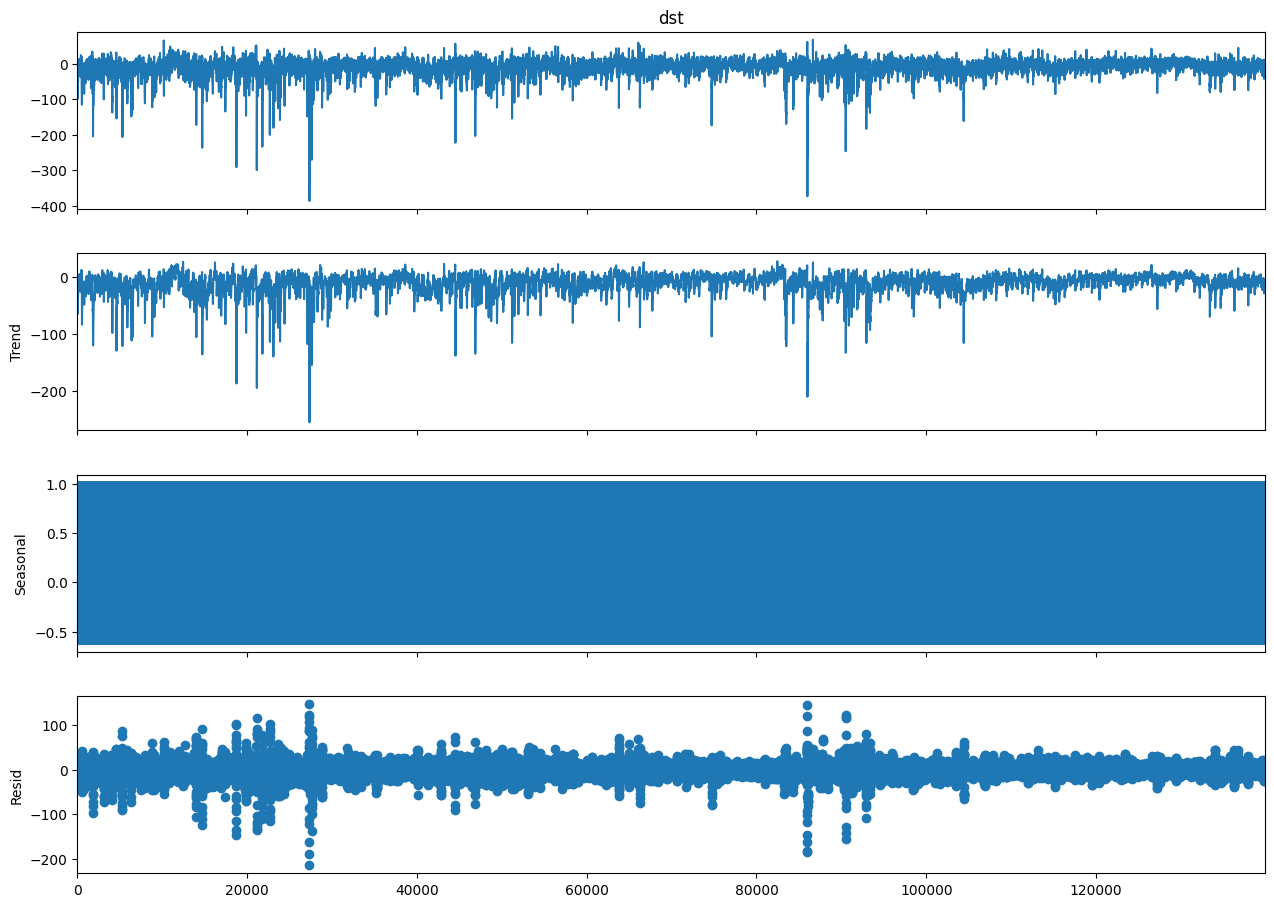

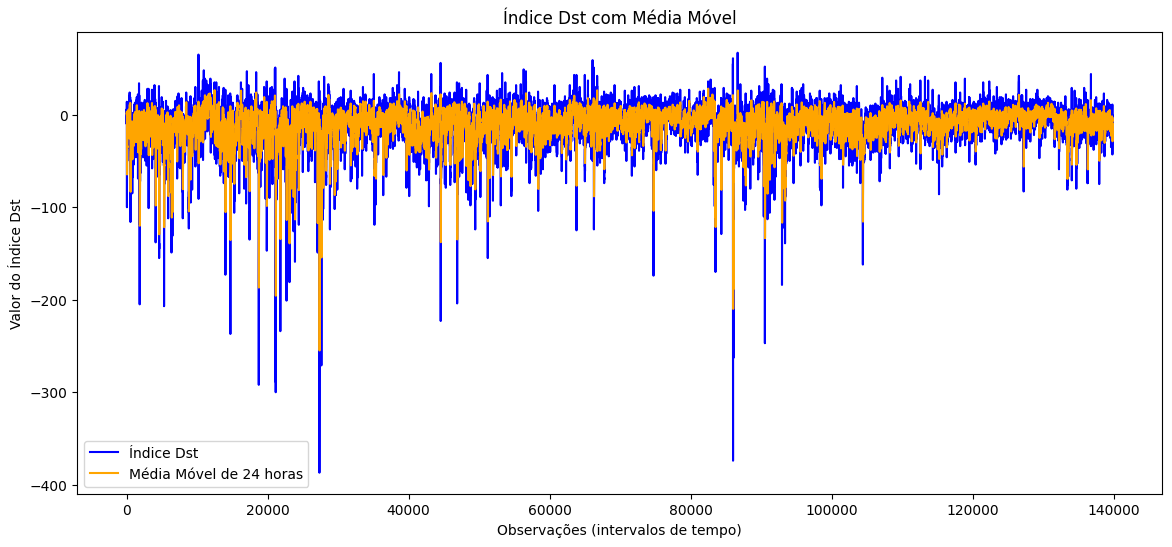

{'Estatística ADF': -27.144766601960644, 'Valor p': 0.0, 'Valores Críticos': {'1%': -3.4303967776368567, '5%': -2.861560675047487, '10%': -2.5667810045930075}}


In [5]:
solar_wind = pd.read_csv(data_path)
labels = pd.read_csv(labels_path)

dst_data = labels['dst']

plt.figure(figsize=(14, 6))
plt.plot(dst_data, label='Índice Dst', color='blue')
plt.xlabel("Observações (intervalos de tempo)")
plt.ylabel("Valor do Índice Dst")
plt.title("Índice Dst ao longo do tempo")
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
sm.graphics.tsa.plot_acf(dst_data, lags=50, ax=ax)
plt.show()

decomposition = sm.tsa.seasonal_decompose(dst_data, model='additive', period=24)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

window_size = 24
media_movel = dst_data.rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(dst_data, label='Índice Dst', color='blue')
plt.plot(media_movel, label=f'Média Móvel de {window_size} horas', color='orange')
plt.xlabel("Observações (intervalos de tempo)")
plt.ylabel("Valor do Índice Dst")
plt.title("Índice Dst com Média Móvel")
plt.legend()
plt.show()

adf_test = adfuller(dst_data.dropna())

adf_test_resultados = {
    "Estatística ADF": adf_test[0],
    "Valor p": adf_test[1],
    "Valores Críticos": adf_test[4]
}
print(adf_test_resultados)